# Homework 4

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from matplotlib import pyplot as plt
from collections import Counter

### Loading dataset

In [2]:
df = pd.read_csv("Downloads/USvideos.csv")
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [3]:
#Checking the shape of the dataset
df.shape

(40949, 16)

In [4]:
#Checking columns in our dataset
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [5]:
#Checking the datatypes of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
video_id                  40949 non-null object
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.2+ MB


In [6]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [7]:
#Checking for null values.
df.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64

### Data Cleaning 

We can see that description has 570 null values we will drop all rows with null description values

In [8]:
#dropping null values
df_clean = df.dropna()
df_clean.isna().sum()

video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
dtype: int64

In [9]:
#counting videos that were removed or having an error 
df_clean.loc[df['video_error_or_removed'] == True].count()

video_id                  21
trending_date             21
title                     21
channel_title             21
category_id               21
publish_time              21
tags                      21
views                     21
likes                     21
dislikes                  21
comment_count             21
thumbnail_link            21
comments_disabled         21
ratings_disabled          21
video_error_or_removed    21
description               21
dtype: int64

as we saw we have 21 videos that have been removed from YouTube
Removing them from the data

In [10]:
#removing videos that were removed or having an error
df_clean = df_clean[df_clean.video_error_or_removed != True]

In [11]:
#checking the shape of the clean data
df_clean.shape

(40358, 16)

### Exploratory Data Analysis

In [12]:
#getting most liked video
df_clean[df_clean['likes'] == df_clean['likes'].max()][['views','title','likes','dislikes','comment_count']]

,views,title,likes,dislikes,comment_count
38273,123010920,BTS (방탄소년단) 'FAKE LOVE' Official MV,5613827,206892,1228655


The most liked YouTube video is BTS (방탄소년단) 'FAKE LOVE' Official MV with 5613827 Likes

In [13]:
#most viewed  video
df_clean[df_clean['views'] == df_clean['views'].max()][['views','title','likes','dislikes','comment_count']]

,views,title,likes,dislikes,comment_count
38547,225211923,Childish Gambino - This Is America (Official V...,5023450,343541,517232


The most viewed YouTube video is Childish Gambino - This Is America with 225211923 views

In [14]:
#most disliked  video
df_clean[df_clean['dislikes'] == df_clean['dislikes'].max()][['views','title','likes','dislikes','comment_count']]

,views,title,likes,dislikes,comment_count
6181,149376127,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,3093544,1643059,810698


In [ ]:
The most viewed YouTube video is YouTube Rewind: The Shape of 2017 with 1643059 dislikes

In [15]:
#The correlation between all categories
df_clean.corr()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
category_id,1.000000,-0.169018,-0.174243,-0.047491,-0.086820,0.047422,-0.013372,NaN
views,-0.169018,1.000000,0.848737,0.558116,0.655827,0.004334,0.015302,NaN
likes,-0.174243,0.848737,1.000000,0.514697,0.853396,-0.028078,-0.021071,NaN
dislikes,-0.047491,0.558116,0.514697,1.000000,0.623129,-0.003760,-0.009817,NaN
comment_count,-0.086820,0.655827,0.853396,0.623129,1.000000,-0.029771,-0.014884,NaN
comments_disabled,0.047422,0.004334,-0.028078,-0.003760,-0.029771,1.000000,0.326995,NaN
ratings_disabled,-0.013372,0.015302,-0.021071,-0.009817,-0.014884,0.326995,1.000000,NaN
video_error_or_removed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
#Finding the correlation between the likes and comments
df_clean['likes'].corr(df_clean['views'])

0.8487369943632355

In [39]:
df_clean['likes'].corr(df_clean['dislikes'])

0.5146970383615391

In [40]:
df_clean['likes'].corr(df_clean['comment_count'])

0.8533958400643513

We see that views and likes are highly positively correlated with a correlation value of 0.85; we see also a high positive correlation (0.85) between likes and comment count, and between dislikes and comment count (0.51).

There is some positive correlation between views and dislikes, between views and comment count, between likes and dislikes.

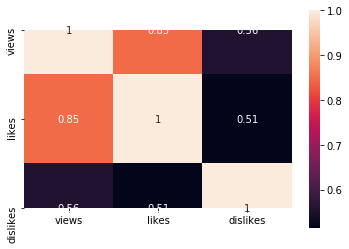

In [16]:
numerical_cols = ['views','likes','dislikes']

sns.heatmap(df_clean[numerical_cols].corr(),square=True, annot=True)

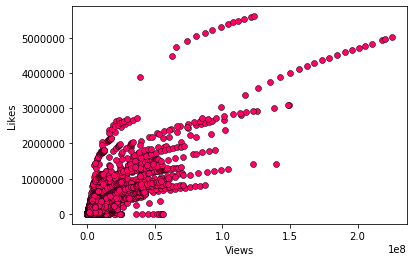

In [48]:
fig, ax = plt.subplots()
_ = plt.scatter(x=df['views'], y=df['likes'], 
                color="#FF0066", edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Views", ylabel="Likes")

We see that views and likes are truly positively correlated: as one increases, the other increases too

## -- The End --